## <b>■ 복습</b>
    1장
    2장
    3장
    4장
    5장
    6장. 신경망 학습 시키는 기술들
        1. 언더피팅
            - 고급 경사 하강법
            - 가중치 초기값
            - 배치 정규화
        2. 오버피팅
            - 가중치 감수
            - 드롭아웃 : 훈련 데이터와 테스트 데이터가 비슷한 정확도 -> 훈련 : 94, 테스트 : 94
            훈련 데이터의 정확도와 테스트 데이터의 정확도가 너무 차이나게 훈련하고 있다면 -> keras 얼리스탑
    7장. CNN
        - CNN 사용하는 이유
            이미지의 형상을 그대로 살려서 학습시키기 위해서
        
        이미지---------- 합성곱 -------------------------- 풀링(pooling) ----------------------------- 완전 연결계층
                  이미지의 특징을 잡아냄         feature map을 선명하게 만들어줌                             분류   
        
        이미지 1장 - 필터의 개수 100개 - 100개 Feature map
        
        

In [1]:
# ■ 3차원 합성곱 코드
import numpy as np
x = np.array([[[1, 2, 3, 0],
               [0, 1, 2, 3],  # --> red 행렬
               [3, 0, 1, 2],
               [2, 3, 0, 1]],
              [[2, 3, 4, 1],
               [1, 2, 3, 4],  # --> green 행렬
               [4, 1, 2, 3],
               [3, 4, 1, 2]],
              [[3, 4, 5, 2],  # --> blue 행렬
               [2, 3, 4, 5],
               [5, 2, 3, 4],
               [4, 5, 2, 3]]])

f = np.array([[[2, 0, 1],
               [0, 1, 2],
               [1, 0, 2]],
              [[3, 1, 2],
               [1, 2, 3],
               [2, 1, 3]],
              [[4, 2, 3],
               [2, 3, 4],
               [3, 2, 4]]])


C, xh, xw = x.shape # 3, 4, 4

size1 = abs(xh-f.shape[1])+1

feature = []

for i in range(C):
    for j in range(size1):
        for k in range(size1):
            feature.append(np.sum(x[i, j:j+xh-1, k:k+xw-1] * f[i, :, :]))
            print('i:', i, ', j:', j,', xh:' ,xh,', k:', k, ', xw:', xw)

feature = np.array(feature).reshape(C, size1, size1)
np.sum(feature, axis=0)

i: 0 , j: 0 , xh: 4 , k: 0 , xw: 4
i: 0 , j: 0 , xh: 4 , k: 1 , xw: 4
i: 0 , j: 1 , xh: 4 , k: 0 , xw: 4
i: 0 , j: 1 , xh: 4 , k: 1 , xw: 4
i: 1 , j: 0 , xh: 4 , k: 0 , xw: 4
i: 1 , j: 0 , xh: 4 , k: 1 , xw: 4
i: 1 , j: 1 , xh: 4 , k: 0 , xw: 4
i: 1 , j: 1 , xh: 4 , k: 1 , xw: 4
i: 2 , j: 0 , xh: 4 , k: 0 , xw: 4
i: 2 , j: 0 , xh: 4 , k: 1 , xw: 4
i: 2 , j: 1 , xh: 4 , k: 0 , xw: 4
i: 2 , j: 1 , xh: 4 , k: 1 , xw: 4


array([[156, 162],
       [126, 156]])

### ※ 문제101. 어제 마지막 시간에 낸 문제의 filter를 이미지로 시각화 하시오

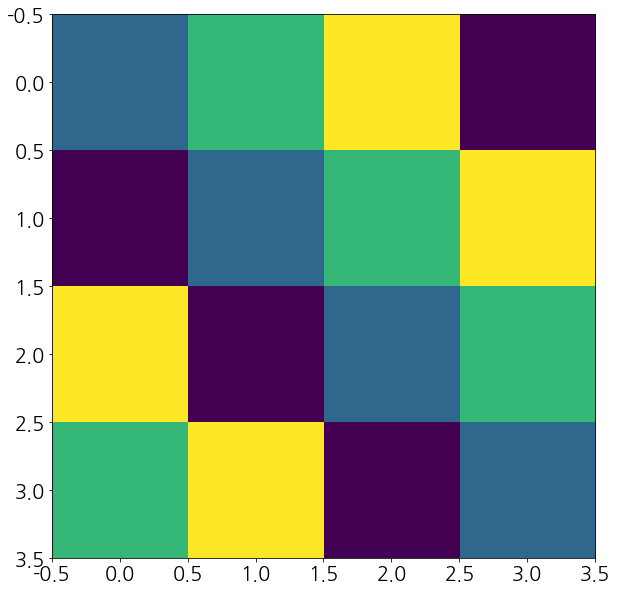

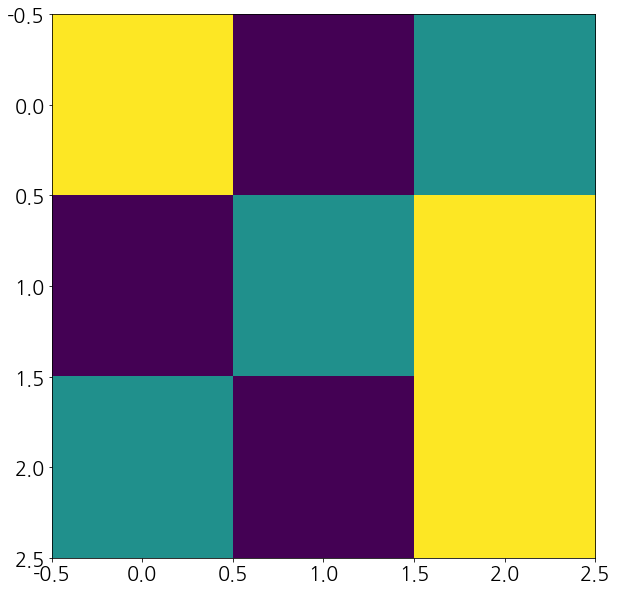

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,10)
plt.rcParams.update({'font.size':20})

x = np.array([[[1, 2, 3, 0],
               [0, 1, 2, 3],  
               [3, 0, 1, 2],
               [2, 3, 0, 1]],
              [[2, 3, 4, 1],
               [1, 2, 3, 4],  
               [4, 1, 2, 3],
               [3, 4, 1, 2]],
              [[3, 4, 5, 2],  
               [2, 3, 4, 5],
               [5, 2, 3, 4],
               [4, 5, 2, 3]]])

f = np.array([[[2, 0, 1],
               [0, 1, 2],
               [1, 0, 2]],
              [[3, 1, 2],
               [1, 2, 3],
               [2, 1, 3]],
              [[4, 2, 3],
               [2, 3, 4],
               [3, 2, 4]]])

# filter = f
# filter[:,:,0]
# filter[:,:,1] = 0
# filter[:,:,2] = 0
plt.imshow(x[0,:,:])
plt.show()

plt.imshow(f[0,:,:])
plt.show()

### ※ 문제102. 카페에 유럽 사진 이미지를 내려받아 shape를 확인하시오

[[[254 234 193]
  [255 231 196]
  [252 230 197]
  ...
  [ 64  63  81]
  [ 64  63  81]
  [ 64  63  79]]

 [[254 234 193]
  [254 233 197]
  [253 231 198]
  ...
  [ 64  62  83]
  [ 65  62  81]
  [ 65  62  81]]

 [[253 234 193]
  [254 233 195]
  [253 232 196]
  ...
  [ 64  62  83]
  [ 65  62  81]
  [ 65  62  81]]

 ...

 [[ 31  10   1]
  [ 33   9   1]
  [ 33   7   0]
  ...
  [ 87  63  58]
  [ 90  64  59]
  [ 88  61  57]]

 [[ 20   8   0]
  [ 22   7   0]
  [ 22   8   0]
  ...
  [ 55  36  29]
  [ 63  41  34]
  [ 65  43  37]]

 [[ 20  10   0]
  [ 21  10   0]
  [ 21  10   0]
  ...
  [ 27  13   4]
  [ 33  16   8]
  [ 33  16   8]]]


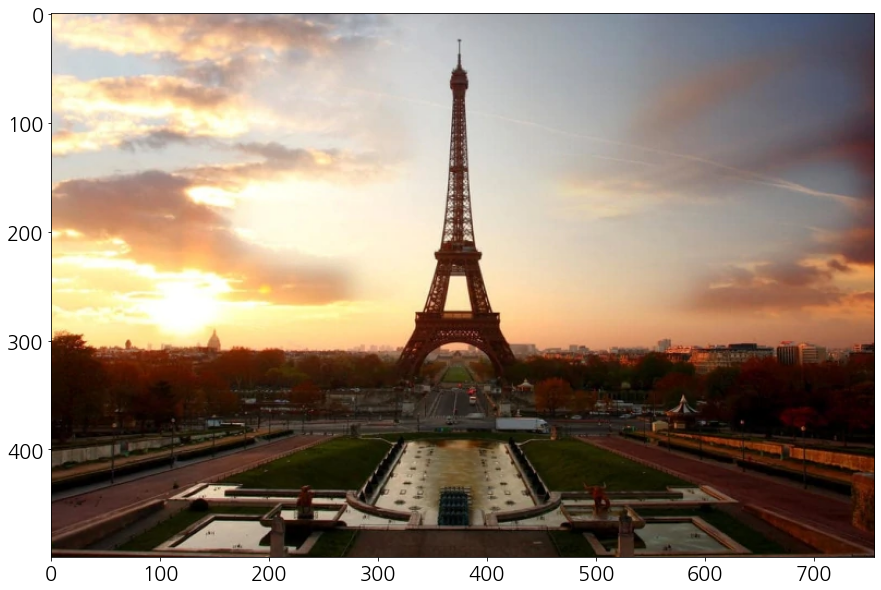

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mgimg

img = Image.open('europe.png')
img_pixel = np.array(img)
plt.imshow(img_pixel)  #  (500, 500, 3)  =  (가로, 세로, 색조(RGB))
print(img_pixel)

### ※ 문제103. europe.png를 아래의 필터로 3차원 합성곱한 feature map을 시각화 하시오

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[401118.93901844 353588.41160404  49673.01771558]
 [314030.55018733  71079.73281338 311211.74001676]
 [ 54229.76758319 383682.71241602 310090.78167966]
 ...
 [353161.31148963  50757.84810083 113050.58781513]
 [ 69894.93422934 312036.58082471 159142.38397685]
 [383741.60877744 310788.47630237  39946.90619003]]


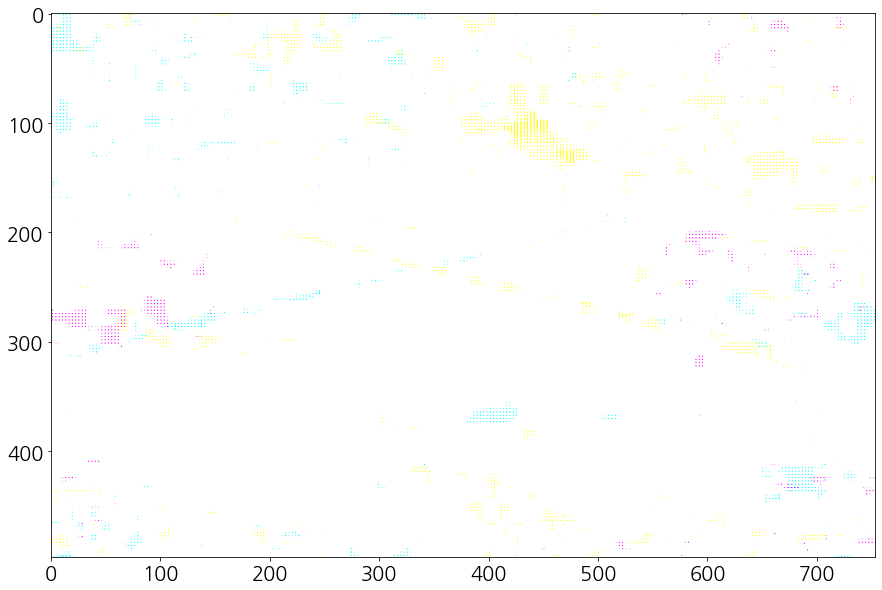

In [25]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mgimg

img = Image.open('europe.png')
x = np.array(img).T

f = np.random.rand(3, 3, 3)

C, xh, xw = x.shape  # (3, 756, 499)

r_size = abs(xh-f.shape[1])+1
c_size = abs(xw-f.shape[2])+1

feature = []

for i in range(r_size):
    for j in range(c_size):
        for k in range(C):
            feature.append(np.sum(x[k, i:f.shape[1]+i, j:f.shape[2]+j]*f[k]))

feature = np.array(feature).reshape(C, r_size, c_size)
print(np.sum(feature.T, axis=0))
plt.imshow(feature.T)
plt.show()

(3, 756, 499)
[[2854 2857 2852 ...  900  889  886]
 [2854 2854 2853 ...  898  890  888]
 [2847 2843 2841 ...  898  890  888]
 ...
 [ 559  556  555 ...  759  809  856]
 [ 259  256  255 ...  707  730  751]
 [ 146  146  144 ...  545  557  573]]


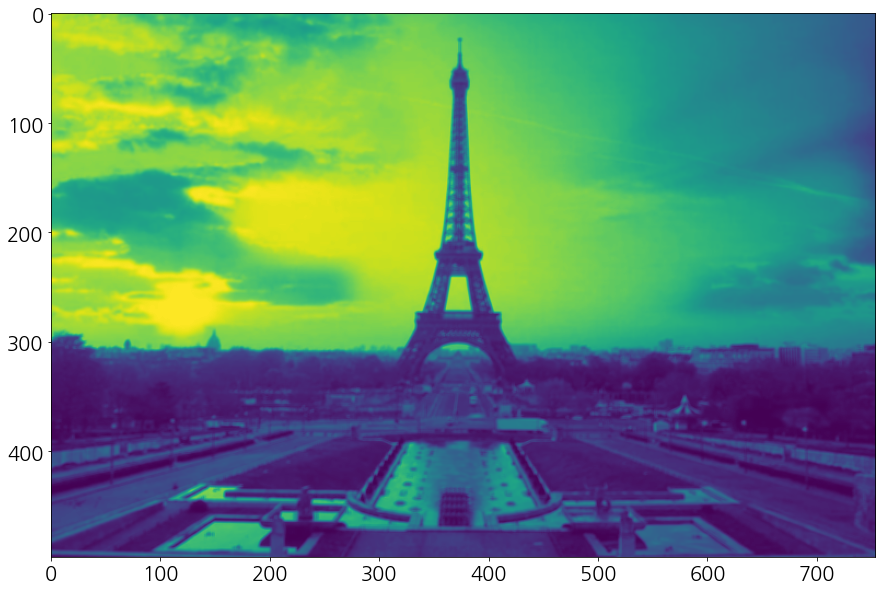

In [26]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = Image.open('europe.png')
img_pixel = np.array(img)
img_pixel_T = img_pixel.T

print(img_pixel_T.shape)  # (3, 756, 499)

filter_ = np.random.rand(3, 3, 3)  # (3, 3, 3)

row = img_pixel_T.shape[1] - filter_.shape[1] + 1
col = img_pixel_T.shape[2] - filter_.shape[2] + 1
x2 = np.array([[0]*col]*row)

for i in range(row):
    for j in range(col):
        for k in range(img_pixel_T.shape[0]):
            x2[i][j] += np.sum(img_pixel_T[k, i:filter_.shape[1] +
                                           i, j:filter_.shape[2]+j]*filter_[k])

print(x2.T)
plt.imshow(x2.T)
plt.show()

### <b>■ 블럭으로 생각하기 (p.237)</b>
    3차원 합성곱 연산은 데이터와 필터를 직육면체 블럭으로 생각
    블럭은 아래의 그림과 같은 3차원 직육면체
    
<b>필터 한 개</b>
![fig7-10](http://cfile267.uf.daum.net/image/99C5344C5F329A5417B76C)

    유럽 사진  RGB 컬러 사진 1장을 RGB필터로 합성곱해서 1개의 feature map을 출력하는 그림

<b>필터 여러개</b>
![fig7-11](http://cfile275.uf.daum.net/image/99A7E4425F329A711FCEA9)

<b>편향도 추가</b>
![fig7-12](http://cfile270.uf.daum.net/image/99E3143A5F329BA55AAE15)

    유럽 사진 1장에 필터 FN개를 합성곱하고 FN개의 편향을 더해서 FN개의 feature map을 출력하는 그림
    
![fig7-13](http://cfile297.uf.daum.net/image/9977B03B5F329B412265BD)

    미니배치 개수 N개 만큼 사진을 입력해서 필터 FN개와 합성곱하여 미니배치 개수 N개 만큼 feature map을 출력하는 그림 (N, C, H, W)
    RGB 사진 1장을 100개의 RGB 필터로 합성곱하면 100개의 feature map이 생기는데 
    100개의 사진이 100개의 RGB 필터와 각각 합성곱하면 사진의 10000장의 feature map이 생성    

### <b>■ 합성곱 계층을 구현하기 위해서 4차원을 2차원으로 변경하는 방법 (p.234 im2col로 데이터 전개하기)</b>
    왜 4차원을 2차원으로 변경해야 하는가
    (N, C, H, W)
        N : 배치의 개수
        합성곱 계층을 구현할 때 신경망에 흘러가는 행렬이 4차원 행렬이 흘러가면서 연산 진행
        문제는 연산 속도가 너무 느려지므로 행렬 계산을 할 때 행렬 연산을 빠르게 하려면 4차원이 아니라 2차원으로 차원 축소가 필요
        
        ∴ im2col 함수가 필요
    
### <b>■ 합성곱 계층을 이해하기 위한 im2col 함수를 사용하는 단계</b>
    im2col 함수의 역할 (p.234)
        이미지를 2차원 행렬로 변환 
![fig7-17](dl_images/fig7-17(e).png)
![im2col](http://cfile254.uf.daum.net/image/991EC1355F329E592E1328)
![im2col2](http://cfile242.uf.daum.net/image/9981243D5F329E8F281DA7)

#### 예제1. 칠판에 나온 아이린 사진 한 장을 3차원 행렬로 만드시오
    RGB 7x7 행렬 1장

In [28]:
import numpy as np
x1 = np.random.rand(1, 3, 7, 7)
print(x1)
print(x1.shape)

[[[[0.33764781 0.09880507 0.18429069 0.72150699 0.55934922 0.81727636
    0.87465567]
   [0.44288203 0.42620304 0.66959407 0.09370871 0.89903332 0.21651041
    0.70879154]
   [0.29781463 0.61608284 0.1618564  0.88720027 0.53440208 0.21981318
    0.12656984]
   [0.07980989 0.96110795 0.19015414 0.24539007 0.35171802 0.88802341
    0.16547977]
   [0.73868592 0.02390791 0.02460003 0.94861565 0.01133999 0.51468355
    0.47094642]
   [0.4479395  0.57164158 0.35577174 0.18940722 0.45774321 0.95166067
    0.05124122]
   [0.19463986 0.58623124 0.23296013 0.38387613 0.17293081 0.19868332
    0.55547706]]

  [[0.4635872  0.5068519  0.38031109 0.35163913 0.86149379 0.15155915
    0.49566102]
   [0.39131662 0.63085329 0.18964762 0.91314118 0.69984155 0.7430258
    0.25283261]
   [0.15380083 0.09674344 0.82570126 0.68675145 0.1166596  0.87755548
    0.66367785]
   [0.34028479 0.87381918 0.68080868 0.85807584 0.83239467 0.44803947
    0.27908042]
   [0.16889689 0.83701997 0.84219229 0.41289681 0.358

#### 예제2. im2col 함수를 이용해서 위에서 만든 아이린 사진 4차원을 2차원 행렬로 변경하시오
    필터는 RGB 5x5 행렬
    p.245 im2col 함수 사용하는 매뉴얼
```python
im2col(input_data, filter_h,    filter_w,    stride=1,  pad=0)
#       4차원배열   필터의 높이   필터의 너비  스트라이드   패딩여부
```

In [29]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """다수의 이미지를 입력받아 2차원 배열로 변환한다(평탄화).

    Parameters
    ----------
    input_data : 4차원 배열 형태의 입력 데이터(이미지 수, 채널 수, 높이, 너비)
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩

    Returns
    -------
    col : 2차원 배열
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2 * pad - filter_h) // stride + 1
    out_w = (W + 2 * pad - filter_w) // stride + 1

    img = np.pad(input_data, [(0, 0), (0, 0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N * out_h * out_w, -1)
    return col

col = im2col(x1, 5, 5)
col.shape

(9, 75)

    원본 이미지를 2차원 필터와 내적하기 좋도록 만든 2차원 행렬

#### 예제3. 사진 10장을 랜덤으로 생성

In [42]:
import numpy as np
x2 = np.random.rand(10,3,7,7)
print(x2)
print(x2.shape)

[[[[2.02538741e-01 7.99881626e-01 8.94291699e-01 ... 9.46983543e-01
    8.42976630e-01 7.06204922e-01]
   [3.73349305e-01 6.79976482e-01 9.94362185e-01 ... 8.48126418e-01
    6.91877773e-01 9.88711491e-01]
   [8.47861845e-01 7.20500332e-01 5.95705115e-01 ... 8.74417135e-01
    5.87296129e-01 5.82836778e-01]
   ...
   [7.73552199e-01 4.44581373e-01 3.25096661e-01 ... 4.70386729e-02
    8.54748456e-01 1.97748855e-02]
   [7.03772743e-01 7.97584571e-01 8.06177943e-02 ... 9.68719698e-01
    4.38183793e-01 8.14817165e-02]
   [9.05898437e-02 8.68809792e-01 1.80396177e-02 ... 8.98051737e-01
    3.60793636e-01 6.64396498e-01]]

  [[7.97948049e-01 7.87155065e-01 2.43734466e-02 ... 1.62524272e-02
    8.05368886e-01 5.10583422e-01]
   [3.40705248e-01 2.13005754e-01 3.48805190e-01 ... 6.68085023e-01
    7.96607510e-01 6.32699797e-02]
   [5.89962506e-01 1.16510245e-01 6.48414512e-01 ... 1.51743144e-01
    4.88921288e-01 2.37673712e-01]
   ...
   [3.38658751e-01 6.11801606e-01 7.69953598e-01 ... 1.19

#### 예제4. 사진 10장을 im2col 함수에 넣어서 2차원 행렬로 변환시키시오
    필터는 5x5 RGB 행렬

In [43]:
x2 = im2col(x2, 5, 5)
x2.shape

(90, 75)

#### 예제5. 사진 10장과 필터 10개를 가지고 합성곱한 결과를 출력하기 위한 준비물이 무엇인가?
    1. 원본 이미지 -> 필터 사이즈에 맞게 2차원 변환 (10,3,7,7) ----> (90,75)
    2. 필터 -> 2차원 변환 (10,3,5,5) ----> (10,75)
    
#### 예제6. RGB 5x5 행렬의 필터 10개를 랜덤으로 생성하시오

In [32]:
import numpy as np
f = np.random.rand(10,3,5,5)
print(f)
print(f.shape)

[[[[0.57198187 0.43441874 0.80668659 0.85583921 0.45583055]
   [0.70475989 0.37841617 0.84543456 0.55790465 0.37878203]
   [0.6405633  0.80380349 0.84988772 0.37574661 0.24757905]
   [0.04982773 0.81475506 0.74095691 0.65581722 0.19003658]
   [0.14461531 0.51250921 0.93143849 0.19523937 0.79944898]]

  [[0.67801915 0.84862197 0.53505175 0.17565299 0.985238  ]
   [0.64268632 0.48432499 0.07754615 0.33431265 0.18564094]
   [0.17339077 0.24798376 0.8429087  0.18353387 0.90950312]
   [0.67089095 0.26518087 0.06325528 0.22213704 0.22199162]
   [0.95239091 0.21776718 0.83530854 0.79061357 0.53793797]]

  [[0.8568276  0.49626034 0.19100391 0.39871148 0.8674331 ]
   [0.33585315 0.15865571 0.41966432 0.05895857 0.88259185]
   [0.38863137 0.2475486  0.71697248 0.27955042 0.52054594]
   [0.62969583 0.2883275  0.82191315 0.71649633 0.81199904]
   [0.16532239 0.5408029  0.53205915 0.28711744 0.32714857]]]


 [[[0.82931501 0.31140888 0.17052664 0.03026604 0.2967697 ]
   [0.05560584 0.0396005  0.7096

    filter는 im2col 사용하지 않고 2차원으로 줄일 수 있다
    numpy의 reshape 기능을 이용해서 줄여나간다.

#### 예제7. 위의 4차원 필터를 3차원으로 변경하시오

In [37]:
print(f.reshape(10,3,-1))
print(f.reshape(10,3,-1).shape)

[[[0.57198187 0.43441874 0.80668659 0.85583921 0.45583055 0.70475989
   0.37841617 0.84543456 0.55790465 0.37878203 0.6405633  0.80380349
   0.84988772 0.37574661 0.24757905 0.04982773 0.81475506 0.74095691
   0.65581722 0.19003658 0.14461531 0.51250921 0.93143849 0.19523937
   0.79944898]
  [0.67801915 0.84862197 0.53505175 0.17565299 0.985238   0.64268632
   0.48432499 0.07754615 0.33431265 0.18564094 0.17339077 0.24798376
   0.8429087  0.18353387 0.90950312 0.67089095 0.26518087 0.06325528
   0.22213704 0.22199162 0.95239091 0.21776718 0.83530854 0.79061357
   0.53793797]
  [0.8568276  0.49626034 0.19100391 0.39871148 0.8674331  0.33585315
   0.15865571 0.41966432 0.05895857 0.88259185 0.38863137 0.2475486
   0.71697248 0.27955042 0.52054594 0.62969583 0.2883275  0.82191315
   0.71649633 0.81199904 0.16532239 0.5408029  0.53205915 0.28711744
   0.32714857]]

 [[0.82931501 0.31140888 0.17052664 0.03026604 0.2967697  0.05560584
   0.0396005  0.70964949 0.82867507 0.69543707 0.91234255

#### 예제8. 아래의 3차원 행렬을 2차원 행렬로 변경하시오
    (10, 3, 25) ----> (10, ?)

In [38]:
print(f.reshape(10,-1))
print(f.reshape(10,-1).shape)

[[0.57198187 0.43441874 0.80668659 0.85583921 0.45583055 0.70475989
  0.37841617 0.84543456 0.55790465 0.37878203 0.6405633  0.80380349
  0.84988772 0.37574661 0.24757905 0.04982773 0.81475506 0.74095691
  0.65581722 0.19003658 0.14461531 0.51250921 0.93143849 0.19523937
  0.79944898 0.67801915 0.84862197 0.53505175 0.17565299 0.985238
  0.64268632 0.48432499 0.07754615 0.33431265 0.18564094 0.17339077
  0.24798376 0.8429087  0.18353387 0.90950312 0.67089095 0.26518087
  0.06325528 0.22213704 0.22199162 0.95239091 0.21776718 0.83530854
  0.79061357 0.53793797 0.8568276  0.49626034 0.19100391 0.39871148
  0.8674331  0.33585315 0.15865571 0.41966432 0.05895857 0.88259185
  0.38863137 0.2475486  0.71697248 0.27955042 0.52054594 0.62969583
  0.2883275  0.82191315 0.71649633 0.81199904 0.16532239 0.5408029
  0.53205915 0.28711744 0.32714857]
 [0.82931501 0.31140888 0.17052664 0.03026604 0.2967697  0.05560584
  0.0396005  0.70964949 0.82867507 0.69543707 0.91234255 0.1128338
  0.09893515 0.7

#### <b>정리</b>
    1. 원본이미지 -> 2차원
        im2col
    2. 필터 -> 2차원
        reshape ( , , -1)

#### 예제9. 사진 원본을 2차원 행렬로 만든 (90, 75)와 4차원 필터를 2차원으로 변경한 행렬인 f2 (10,75)를 행렬곱 하는데 내적하기 위해 f2를 전치시켜서 내적하시오

In [44]:
x3 = np.random.rand(10,3,7,7)
col3 = im2col(x3,5,5)

f = np.random.rand(10,3,5,5)
f2 = f.reshape(10,-1)

out = np.dot(col3, f2.T)
print(out.shape)

(90, 10)


### ※ 문제104. 사진 100장(7x7)을 랜덤으로 생성하고 5x5 필터를 50개를 랜덤으로 생성해서 각각 2차원으로 변경하고 내적한 행렬의 shape를 출력하시오

In [47]:
sh = np.random.rand(100,3,7,7)
col_sh = im2col(sh,5,5)

f_sh = np.random.rand(50,3,5,5)
f2_sh = f_sh.reshape(50,-1)

out_sh = np.dot(col_sh, f2_sh.T)
print(out_sh.shape)

(900, 50)


#### 예제10. 위의 2차원을 4차원으로 변경하시오
    10장 사진 --> 2차원 --> 4차원
    
![e7.1](dl_images/e7.1(e).png)

    reshape(N, OH, OW, C) --(transpose)--> (0, 3, 1, 2)
            0   1   2  3

In [52]:
x3 = np.random.rand(10,3,7,7)
col3 = im2col(x3,5,5)

f = np.random.rand(10,3,5,5)
f2 = f.reshape(10,-1)

out = np.dot(col3, f2.T)
out_trans = out.reshape(10,3,3,-1).transpose(0,3,1,2)
print(out.shape)
print(out_trans.shape)

(90, 10)
(10, 10, 3, 3)


### <b>■ Convolution 계층에서 일어나는 일 (p.146)</b>
    1. 원본 이미지를 im2col 함수로 2차원 행렬로 변환
    2. filter를 reshape의 -1 옵션을 이용해서 2차원 행렬로 변경
    3. 두 개의 2차원 행렬을 내적
    4. 내적한 결과 2차원 행렬을 다시 4차원으로 변경
    
    Convolution층의 역할
        이미지의 특징을 추출하는feature map을 여러개 만든다

### ※ 문제105. 책 246페이지 클래스 Convolution을 위의 단계를 생각하면서 코딩하고 아래의 필기체 데이터 한 장을 Convolution 계층에 흘려보내시오

In [57]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    N, C, H, W = input_data.shape
    out_h = (H + 2 * pad - filter_h) // stride + 1
    out_w = (W + 2 * pad - filter_w) // stride + 1

    img = np.pad(input_data, [(0, 0), (0, 0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N * out_h * out_w, -1)
    return col

class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1+ (H+ 2*self.pad - FH) / self.stride)
        out_w = int(1+ (W+ 2*self.pad - FW) / self.stride)
        
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T
        out = np.dot(col, col_W) + self.b
        
        out = out.reshape(N, out_h, out_w, -1).transpose(0,3,1,2)
        
        return out

In [58]:
import numpy as np
x1 = np.random.randn(1,3,28,28)

filter = np.random.randn(10,3,5,5)
b1 = 1

conv = Convolution(filter, b1)
fe_map = conv.forward(x1)
print(f'fe_map의 shape는 {fe_map.shape}')

fe_map의 shape는 (1, 10, 24, 24)


### ※ 문제106. 이번에는 padding을 2로 하고 원본 이미지를 10장을 입력하면 feature map의 shape가 어떻게 되는지 확인하시오

In [60]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    N, C, H, W = input_data.shape
    out_h = (H + 2 * pad - filter_h) // stride + 1
    out_w = (W + 2 * pad - filter_w) // stride + 1

    img = np.pad(input_data, [(0, 0), (0, 0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N * out_h * out_w, -1)
    return col

class Convolution:
    def __init__(self, W, b, stride=1, pad=2):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1+ (H+ 2*self.pad - FH) / self.stride)
        out_w = int(1+ (W+ 2*self.pad - FW) / self.stride)
        
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T
        out = np.dot(col, col_W) + self.b
        
        out = out.reshape(N, out_h, out_w, -1).transpose(0,3,1,2)
        
        return out
    
import numpy as np
x1 = np.random.randn(10,3,28,28)

filter = np.random.randn(10,3,5,5)
b1 = 1

conv = Convolution(filter, b1)
fe_map = conv.forward(x1)
print(f'fe_map의 shape는 {fe_map.shape}')

fe_map의 shape는 (10, 10, 28, 28)


    원본이미지 ----> Conv ----> Pooling ----> fully Connected

### <b>■ 풀링(pooling)층의 역할 (p.240)</b>
    convolution 층이 이미지의 특징을 잡아내는 역할을 한다면 pooling 층은 feature map은 이미지를 선명하게 만드는 역할을 한다.
    
    출력값에서 일부분만 취하는 기능
    
    convolution 층이 망쳐놓은 그림들을 가지고 feature map 이미지의 각 부분에서 대표값을 뽑아 사이즈가 작은 이미지를 만드는 것
        사진을 축소하면 해상도가 좋아지는 듯한 효과와 비슷
    
    풀링(pooling)의 종류
        1. 최대풀링(max pooling) : convolution 데이터에서 가장 큰 값을 대표값으로 선정
            이미지를 선명하게 하는 효과
            
        2. 평균풀링(avg pooling) : convolution 데이터에서 모든 값의 평균값을 대표값으로 선정
            이미지를 부드럽게 하는 효과
            
        3. 확률적 풀링(prob pooling) : convolution 데이터에서 임의의 확률로 한개를 선정
            
#### 예제1. 파이썬으로 아래의 행렬을 만드시오
$$\begin{pmatrix} 21 & 8 & 8 & 12 \\ 12 & 19 & 9 & 7 \\ 8 & 10 & 4 & 3 \\ 18 & 12 & 9 & 10 \\ \end{pmatrix}$$

In [62]:
import numpy as np
x = np.array([21,8,8,12,12,19,9,7,8,10,4,3,18,12,9,10]).reshape(4,4)
x

array([[21,  8,  8, 12],
       [12, 19,  9,  7],
       [ 8, 10,  4,  3],
       [18, 12,  9, 10]])

#### 예제2. 아래의 행렬에서 max pooling을 시도해서 아래의 결과를 출력하시오
$$\begin{pmatrix} 21 & 8 & 8 & 12 \\ 12 & 19 & 9 & 7 \\ 8 & 10 & 4 & 3 \\ 18 & 12 & 9 & 10 \\ \end{pmatrix} \rightarrow \begin{pmatrix} 21 & 12 \\ 18 & 10 \\ \end{pmatrix}$$

In [77]:
import numpy as np

def max_pooling(x):
    x1 = []
    for i in range(0,len(x),2):
        for j in range(0,len(x),2):
            x1.append(x[i:i+2,j:j+2].max())
    x1 = np.array(x1)
    return x1.reshape(int(len(x)/2),-1)

x = np.array([21,8,8,12,12,19,9,7,8,10,4,3,18,12,9,10]).reshape(4,4)
max_pooling(x)

array([[21, 12],
       [18, 10]])

### <b>■ 위의 문제를 im2col 함수를 이용해서 간단하게 해결하는 방법</b>
$$\begin{pmatrix} 21 & 8 & 8 & 12 \\ 12 & 19 & 9 & 7 \\ 8 & 10 & 4 & 3 \\ 18 & 12 & 9 & 10 \\ \end{pmatrix} \rightarrow \begin{pmatrix} 21 & 12 \\ 18 & 10 \\ \end{pmatrix}$$

In [83]:
x = np.array([21,8,8,12,12,19,9,7,8,10,4,3,18,12,9,10]).reshape(4,4)

print(x.ndim) # 2
print(x.shape) # (4,4)

# 위의 2차원 행렬을 im2col의 입력값으로 넣을 수 있도록 4차원 행렬로 변환

x2 = x.reshape(1,1,4,4)

print(x2.shape)
print(x2.ndim)

print(x2)
print(im2col(x2, 2, 2, stride=2, pad=0))

2
(4, 4)
(1, 1, 4, 4)
4
[[[[21  8  8 12]
   [12 19  9  7]
   [ 8 10  4  3]
   [18 12  9 10]]]]
[[21.  8. 12. 19.]
 [ 8. 12.  9.  7.]
 [ 8. 10. 18. 12.]
 [ 4.  3.  9. 10.]]
